# 01-06 : Human Feedback

Improve the classifications with Human Feedback.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Markdown

In [2]:
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

## Data Load

In [3]:
# load the chatbot classifications
df_source = pd.read_parquet('../../data/interim/01-05_chatbot_classifications.parquet.gz')

# show the data loaded
print(df_source.shape)
display(df_source.head(3))

(235, 15)


,id,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion
3,3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...
5,3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...
11,3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...


## Exploratory Data Analysis

### Reviews by Business

The bulk of the reviews are for Vodacom (85%), followed bny Telkom (12%). This might indicate that Vodacom might be the only telecommunications provider focussing on chatbot technology for customer service.

In [4]:
df_source.business_slug.value_counts(normalize=True)

business_slug
vodacom                           0.846809
telkom                            0.114894
mtn                               0.025532
cell-c                            0.008511
rain-internet-service-provider    0.004255
Name: proportion, dtype: float64

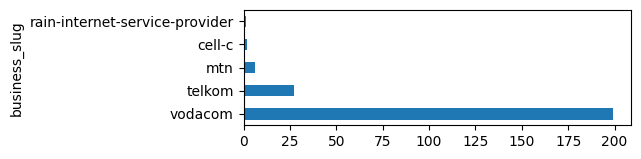

In [5]:
# the number of complaints by business
df_source.business_slug.value_counts().plot(kind='barh', figsize=(5, 1.5))
plt.show()

### Chatbot Classifications

There is a large number of classifications, and some of them are very similar. There is thus an opportunity to reduce the number of classifications by grouping similar classifications together and standardising the classification names.

In [6]:
# show the top 10 most common labels
df_source.chatbot_classification.value_counts().head(10)

chatbot_classification
Customer service                         70
Customer support                         20
Customer Service                         20
Customer Care                             9
Ineffective chatbot                       9
Customer Support                          8
Customer dissatisfaction with chatbot     8
Technical issue                           7
Poor performance                          4
Ineffective                               4
Name: count, dtype: int64

In [7]:
# show all the classifications
df_source.chatbot_classification \
    .str.lower() \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .sort_values('chatbot_classification')

,chatbot_classification,count
37,annoyance,1
51,annoying calls,1
11,billing,2
16,complaint,2
30,complaint about chatbot assistance,1
13,complaint about chatbot functionality,2
2,customer care,10
38,customer care assistance,1
8,customer care chatbot,3
43,customer complaint,1


### Complaint Service

Some of the services mentioned the telecommunications company name which is incorrect, there are also too many categories to be useful. Ideally these services should map to actual services offered in the tellecommunications industry.

In [8]:
# show the top 10 most common labels
df_source.complaint_service.value_counts().head(10)

complaint_service
Vodacom                  104
Telkom                    14
MTN                        4
Vodabucks                  3
Vodacom customer care      3
Call center                3
Vodabucks Store            2
Vodacom online deals       2
Contract cancellation      2
Tax invoice                2
Name: count, dtype: int64

In [9]:
# show all the classifications
df_source.complaint_service \
    .str.lower() \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .sort_values('complaint_service')

,complaint_service,count
24,,1
91,135,1
79,airtime,1
78,airtime purchase,1
56,app,1
...,...,...
30,vodocom,1
72,voice bundle,1
14,webmail7,1
95,whatsapp bundles,1


### Complaint Classification

In [10]:
# show the top 10 most common labels
df_source.complaint_classification.value_counts().head(10)

complaint_classification
Customer service         38
Customer Service         31
Service                  23
Billing                  22
Poor customer service    13
Poor service              8
Service complaint         6
Service issue             4
Fraud                     4
Technical issue           4
Name: count, dtype: int64

In [11]:
# show all the classifications
df_source.complaint_classification \
    .str.lower() \
    .value_counts() \
    .to_frame() \
    .reset_index() \
    .sort_values('complaint_classification')

,complaint_classification,count
31,,1
32,airtime issue,1
69,appalling service,1
19,bad service,2
58,bad services,1
...,...,...
24,unauthorized credit checks,1
43,unauthorized subscription,1
68,unreliable service provider,1
62,unwanted caller tune,1


### Export for Review

Export the data for manual human review.

In [12]:
df_source.to_excel('../../data/interim/01-06_human_feedback.xlsx', index=False)

## Explore Human Feedback

In [13]:
df_source_human = pd.read_excel('../../data/raw/01-06_human_feedback.xlsx')

# show the data read
print(df_source_human.shape)
display(df_source_human.head())

(235, 17)


,id,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,human_chatbot_classification,chatbot_description,chatbot_suggestion,human_complaint_classification,complaint_classification,complaint_service,complaint_description,complaint_suggestion
0,3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,"limited functionality, unable to contact human...",The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,blacklist,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...
1,3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,"technical error, unable to contact human agent",The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,missing airtime,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...
2,3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,"limited functionality, unable to contact human...",The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,voice bundle,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...
3,3358601,2021-01-20 06:28:13,1,"Vodacom not assisting customers, but extorting...","I have many complaints, but will highlight the...",vodacom,1,The complaint mentions the chatbot as being da...,Ineffective chatbot,"limited functionality, unable to contact human...",The chatbot does not provide helpful assistanc...,Improve the chatbot's ability to provide accur...,billing,Poor customer service,Vodacom,The customer is unable to contact Vodacom due ...,Resolve the issue of phone locking and improve...
4,3367621,2021-01-27 10:41:25,1,Missing airtime/No customer service,My airtime just went missing. Failed to purcha...,vodacom,1,The complaint mentions a bot system which does...,Technical issue,"limited functionality, unable to contact human...",The customer is complaining about the non-func...,Improve the bot system to ensure it is functio...,data bundle,Service issue,Vodacom,"The customer's airtime went missing, failed to...",Provide better customer service support and fi...


### Chatbot Classifications

In [14]:
df_source_human.human_chatbot_classification.value_counts()

human_chatbot_classification
limited functionality, unable to contact human agent    98
unable to contact human agent                           48
limited functionality                                   40
technical error                                         13
technical error, unable to contact human agent           8
safety concern                                           7
limited functionality, technical error                   3
Name: count, dtype: int64

### Complaint Classification

In [15]:
df_source_human.human_complaint_classification.value_counts()

human_complaint_classification
customer service         56
billing                  32
data bundle              22
fraud                    16
missing airtime          11
upgrade                  10
vodabucks                 8
subscription services     8
new contract              7
blacklist                 7
internet                  7
courier delivery          6
roaming                   6
network                   6
vodamail                  5
sim swap                  5
device                    3
FTTH                      3
cancellation              2
number recycle            2
cancel bundle             2
sms spam                  2
downgrade account         2
rewards                   1
number does not exist     1
voice bundle              1
vodapay                   1
lock sim                  1
Name: count, dtype: int64

## Create Human Feedback Dataset

In [16]:
df_human = df_source_human[['id', 'human_chatbot_classification', 'human_complaint_classification']]

# show the first 5 rows
print(df_human.shape)
display(df_human.head())

(235, 3)


,id,human_chatbot_classification,human_complaint_classification
0,3344640,"limited functionality, unable to contact human...",blacklist
1,3347241,"technical error, unable to contact human agent",missing airtime
2,3353838,"limited functionality, unable to contact human...",voice bundle
3,3358601,"limited functionality, unable to contact human...",billing
4,3367621,"limited functionality, unable to contact human...",data bundle


In [17]:
# join to the original source data
df_out = df_source.set_index('id') \
    .join(df_human.set_index('id'), how='left') \
    .reset_index()

# save the output
df_out.to_parquet('../../data/interim/01-06_human_classified.parquet', compression='gzip')

# show the output
print(df_out.shape)
display(df_out.head())

(235, 17)


,id,created_at,review_rating,review_title,review_content,business_slug,chatbot_related,chatbot_evidence,chatbot_classification,chatbot_description,chatbot_suggestion,complaint_classification,complaint_service,complaint_description,complaint_suggestion,human_chatbot_classification,human_complaint_classification
0,3344640,2021-01-07 13:22:34,1,No option to speak to the agent on the custome...,Am not able to call vodacom to block my number...,vodacom,1,The customer mentioned that the Tobi bot canno...,Customer care assistance,The customer is complaining about not being ab...,Improve the chatbot's availability and provide...,Customer care,Vodacom,The customer is unable to call Vodacom to bloc...,Provide an option for customers to speak to an...,"limited functionality, unable to contact human...",blacklist
1,3347241,2021-01-10 11:32:59,1,"Airtime charged, but not credited to my phone",Bought Airtime online through the Vodacom App ...,vodacom,1,The customer mentioned trying to chat with TOB...,Customer service,The customer complained about being thrown out...,Improve the stability of the chatbot to preven...,Billing,Airtime,The customer bought airtime online but it was ...,Investigate the issue and credit the airtime t...,"technical error, unable to contact human agent",missing airtime
2,3353838,2021-01-15 11:32:11,1,Chatbot Tobi/ Voice Bundle,I am disappointed at how your service has beco...,vodacom,1,The complaint mentions the introduction of a c...,Limited functionality,The chatbot has made it impossible for custome...,Improve the chatbot's capabilities to handle a...,Service issue,Voice Bundle,Failed to load voice bundle but debited the cu...,Load the customer's voice bundle or reimburse ...,"limited functionality, unable to contact human...",voice bundle
3,3358601,2021-01-20 06:28:13,1,"Vodacom not assisting customers, but extorting...","I have many complaints, but will highlight the...",vodacom,1,The complaint mentions the chatbot as being da...,Ineffective chatbot,The chatbot does not provide helpful assistanc...,Improve the chatbot's ability to provide accur...,Poor customer service,Vodacom,The customer is unable to contact Vodacom due ...,Resolve the issue of phone locking and improve...,"limited functionality, unable to contact human...",billing
4,3367621,2021-01-27 10:41:25,1,Missing airtime/No customer service,My airtime just went missing. Failed to purcha...,vodacom,1,The complaint mentions a bot system which does...,Technical issue,The customer is complaining about the non-func...,Improve the bot system to ensure it is functio...,Service issue,Vodacom,"The customer's airtime went missing, failed to...",Provide better customer service support and fi...,"limited functionality, unable to contact human...",data bundle
